In [1]:
import numpy as np
import tensorflow as tf

In [2]:
diabetes=np.loadtxt('./data-03-diabetes.csv',delimiter=',')

In [3]:
x_data=diabetes[:,:-1]
y_data=diabetes[:,[-1]]

In [4]:
x_data.shape

(759, 8)

In [9]:
X=tf.placeholder(tf.float32,shape=[None,8])
Y=tf.placeholder(tf.float32,shape=[None,1])

In [13]:
W=tf.Variable(tf.random_normal([8,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

In [14]:
hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

In [18]:
cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [19]:
#정확도 hypothesis 0.5> else false
predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val,_=sess.run([cost,train],
                              feed_dict={X:x_data,Y:y_data})
        if step%200==0:
            print(step,cost_val)
    
    _,_,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nAccuracy:',a)

0 0.75826806
200 0.6715275
400 0.64186466
600 0.62277377
800 0.607225
1000 0.5938767
1200 0.5822863
1400 0.57218295
1600 0.56334966
1800 0.55560285
2000 0.5487864
2200 0.5427672
2400 0.5374332
2600 0.53268915
2800 0.5284543
3000 0.5246602
3200 0.5212493
3400 0.5181721
3600 0.5153866
3800 0.51285696
4000 0.5105524
4200 0.5084468
4400 0.5065171
4600 0.5047439
4800 0.5031102
5000 0.50160104
5200 0.5002038
5400 0.49890697
5600 0.49770072
5800 0.4965767
6000 0.4955267
6200 0.4945445
6400 0.4936239
6600 0.49275935
6800 0.49194637
7000 0.49118057
7200 0.49045822
7400 0.48977584
7600 0.48913056
7800 0.48851928
8000 0.4879398
8200 0.4873896
8400 0.48686674
8600 0.48636937
8800 0.48589566
9000 0.48544416
9200 0.48501343
9400 0.48460206
9600 0.4842089
9800 0.48383296
10000 0.48347285

Accuracy: 0.7654809


퍼셉트론은 인공신경망,오차역전파등 발전을 거쳐 딥러닝으로 이어짐

인간의 뇌는 1000억개의 뉴런으로 이루어짐. 여기서 시냅스라는 연결 부위가 있는데 신경 말단에서 자극 받으면 화학물질이 나와 전위변화 일으킴
임계값 넘으면 다음 뉴런으로 신호를 전달하고 임계값에 미치지 못하면 아무것도 하지 않음=>퍼셉트론의 개념과 유사함

신경망을 이루는 가장 중요한 단위는 퍼셉트론
퍼셉트론: 활성화함수와 입력값 사용해 출력값을 다음으로 넘기는 가장 작은 신경망 단위

뉴펀의 수상돌기에서 입력받는 부분->퍼셉트론은 x값

0,1를 판단하는 시그모이드 함수가 활성화 함수.

가중합의 결과를 놓고 1,0 출력해 다음으로 보냄

In [27]:
#xor는 둘이 같을 때 다를때 따라 참거짓이 결정됨
x_data=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
y_data=np.array([[0],[0],[1],[1]],dtype=np.float32)

X=tf.placeholder(tf.float32,[None,2],name='x_input')
Y=tf.placeholder(tf.float32,[None,1],name='y_input')
W=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        
        if step%100==0:
            print('step = ',step,'cost = ',sess.run(cost,feed_dict=
        {X:x_data,Y:y_data}),'W = ',sess.run(W),'b = ',sess.run(b))
            
    h,c,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis',h,'\ncorrect : ',c,'\nAccuracy',a)

step =  0 cost =  0.7550116 W =  [[0.87787414]
 [0.34893218]] b =  [-2.1340835]
step =  100 cost =  0.24054465 W =  [[2.6505814 ]
 [0.44775203]] b =  [-1.4545572]
step =  200 cost =  0.16688189 W =  [[3.446188  ]
 [0.22113554]] b =  [-1.6644951]
step =  300 cost =  0.12749438 W =  [[4.0203323 ]
 [0.07667799]] b =  [-1.8681681]
step =  400 cost =  0.102997676 W =  [[ 4.47303   ]
 [-0.01744721]] b =  [-2.0427995]
step =  500 cost =  0.08631049 W =  [[ 4.8465204 ]
 [-0.08266828]] b =  [-2.193915]
step =  600 cost =  0.074220434 W =  [[ 5.164115 ]
 [-0.1302006]] b =  [-2.326724]
step =  700 cost =  0.06506364 W =  [[ 5.4401636 ]
 [-0.16622727]] b =  [-2.4450274]
step =  800 cost =  0.057891756 W =  [[ 5.6841536 ]
 [-0.19438986]] b =  [-2.551591]
step =  900 cost =  0.05212518 W =  [[ 5.902668 ]
 [-0.2169587]] b =  [-2.6484747]
step =  1000 cost =  0.047389675 W =  [[ 6.1004586]
 [-0.2354167]] b =  [-2.7372487]
step =  1100 cost =  0.043432876 W =  [[ 6.2810674 ]
 [-0.25077084]] b =  [-2.81


Hypothesis [[0.00716639]
 [0.00485656]
 [0.9967546 ]
 [0.9952074 ]] 
correct :  [[0.]
 [0.]
 [1.]
 [1.]] 
Accuracy 1.0


In [30]:
x_data=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
y_data=np.array([[0],[1],[1],[1]],dtype=np.float32)

X=tf.placeholder(tf.float32,[None,2],name='x_input')
Y=tf.placeholder(tf.float32,[None,1],name='y_input')
W=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        
        if step%100==0:
            print('step = ',step,'cost = ',sess.run(cost,feed_dict=
        {X:x_data,Y:y_data}),'W = ',sess.run(W),'b = ',sess.run(b))
            
    h,c,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis',h,'\ncorrect : ',c,'\nAccuracy',a)

step =  0 cost =  0.5049428 W =  [[ 1.0910542]
 [-0.278439 ]] b =  [0.3692601]
step =  100 cost =  0.33093858 W =  [[1.7053379 ]
 [0.80603594]] b =  [0.2925148]
step =  200 cost =  0.25822678 W =  [[2.1020849]
 [1.4639286]] b =  [-0.07362484]
step =  300 cost =  0.2105129 W =  [[2.4454634]
 [1.9784577]] b =  [-0.37926635]
step =  400 cost =  0.177067 W =  [[2.753294 ]
 [2.4022672]] b =  [-0.6233391]
step =  500 cost =  0.15241216 W =  [[3.0315897]
 [2.7610898]] b =  [-0.82356566]
step =  600 cost =  0.1335203 W =  [[3.284444 ]
 [3.0712612]] b =  [-0.99280185]
step =  700 cost =  0.118605375 W =  [[3.5152738]
 [3.3438892]] b =  [-1.1393114]
step =  800 cost =  0.10654895 W =  [[3.7270002]
 [3.5867968]] b =  [-1.2684957]
step =  900 cost =  0.09661491 W =  [[3.9221127]
 [3.8056514]] b =  [-1.384032]
step =  1000 cost =  0.08829838 W =  [[4.1027207]
 [4.004677 ]] b =  [-1.4885275]
step =  1100 cost =  0.08124203 W =  [[4.2706046]
 [4.1870875]] b =  [-1.5838995]
step =  1200 cost =  0.0751

In [32]:
x_data=np.array([[0,0],[0,1],[1,0],[1,1]])
y_data=np.array([[1],[1],[1],[0]])

X=tf.placeholder(tf.float32,[None,2],name='x_input')
Y=tf.placeholder(tf.float32,[None,1],name='y_input')
W=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        
        if step%100==0:
            print('step = ',step,'cost = ',sess.run(cost,feed_dict=
        {X:x_data,Y:y_data}),'W = ',sess.run(W),'b = ',sess.run(b))
            
    h,c,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis',h,'\ncorrect : ',c,'\nAccuracy',a)

step =  0 cost =  1.9444804 W =  [[-1.328093 ]
 [-1.4956368]] b =  [-1.5492636]
step =  100 cost =  0.41858563 W =  [[-0.7120575 ]
 [-0.81229913]] b =  [1.4719437]
step =  200 cost =  0.33635756 W =  [[-1.1602939]
 [-1.2196164]] b =  [2.141063]
step =  300 cost =  0.28375018 W =  [[-1.5389718]
 [-1.575391 ]] b =  [2.6460626]
step =  400 cost =  0.24638483 W =  [[-1.8524232]
 [-1.8754731]] b =  [3.0760708]
step =  500 cost =  0.21817082 W =  [[-2.121021 ]
 [-2.1360266]] b =  [3.4527676]
step =  600 cost =  0.1959486 W =  [[-2.357106]
 [-2.367132]] b =  [3.7888806]
step =  700 cost =  0.17790651 W =  [[-2.5684004]
 [-2.5752585]] b =  [4.09286]
step =  800 cost =  0.16292104 W =  [[-2.7600398]
 [-2.764832 ]] b =  [4.3706374]
step =  900 cost =  0.15025207 W =  [[-2.9356263]
 [-2.939041 ]] b =  [4.626553]
step =  1000 cost =  0.13938847 W =  [[-3.097794 ]
 [-3.1002715]] b =  [4.8638997]
step =  1100 cost =  0.12996349 W =  [[-3.2485406]
 [-3.250368 ]] b =  [5.085241]
step =  1200 cost =  0

In [34]:
x_data=np.array([[0,0],[0,1],[1,0],[1,1]])
y_data=np.array([[0],[1],[1],[0]])

X=tf.placeholder(tf.float32,[None,2],name='x_input')
Y=tf.placeholder(tf.float32,[None,1],name='y_input')
W=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        
        if step%100==0:
            print('step = ',step,'cost = ',sess.run(cost,feed_dict=
        {X:x_data,Y:y_data}),'W = ',sess.run(W),'b = ',sess.run(b))
            
    h,c,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis',h,'\ncorrect : ',c,'\nAccuracy',a)

step =  0 cost =  1.0279329 W =  [[-0.34151542]
 [ 1.3313668 ]] b =  [1.1395391]
step =  100 cost =  0.70780456 W =  [[-0.53441834]
 [ 0.421083  ]] b =  [0.10838742]
step =  200 cost =  0.6974172 W =  [[-0.30465436]
 [ 0.20931505]] b =  [0.05741081]
step =  300 cost =  0.69439894 W =  [[-0.16993015]
 [ 0.10518572]] b =  [0.03843546]
step =  400 cost =  0.6935169 W =  [[-0.09538578]
 [ 0.05166876]] b =  [0.02593224]
step =  500 cost =  0.69325817 W =  [[-0.05404055]
 [ 0.02453076]] b =  [0.01750231]
step =  600 cost =  0.69318134 W =  [[-0.03094714]
 [ 0.01102862]] b =  [0.01181328]
step =  700 cost =  0.69315803 W =  [[-0.01793434]
 [ 0.00448996]] b =  [0.00797352]
step =  800 cost =  0.6931508 W =  [[-0.01052694]
 [ 0.00145244]] b =  [0.00538183]
step =  900 cost =  0.6931485 W =  [[-0.00626228]
 [ 0.00013729]] b =  [0.00363253]
step =  1000 cost =  0.69314766 W =  [[-0.00377646]
 [-0.00035771]] b =  [0.00245183]
step =  1100 cost =  0.6931474 W =  [[-0.00230841]
 [-0.00048202]] b =  

step =  9900 cost =  0.6931472 W =  [[-8.850489e-08]
 [-8.804446e-08]] b =  [1.19166465e-07]
step =  10000 cost =  0.6931472 W =  [[-8.850489e-08]
 [-8.804446e-08]] b =  [1.19166465e-07]

Hypothesis [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
correct :  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy 0.5


and,or는 직선을 그어 구분할 수 있지만 xor은 아니다.

not을 구분하는 직선과 and하는 부분을 0으로 정의하면 xor 연산자를 만족

두개의 직선을 만들기 위해 두개의 뉴런이 필요하고 교차시키는 연산이 필요함.
nand,or를 이용해야함 and에서 교집합을 해야함

In [37]:
w11=np.array([-2,-2])
w12=np.array([2,2])
w2=np.array([1,1])
b1=3
b2=-1
b3=-1

In [40]:
def MLP(x,w,b):
    y=np.sum(x*w)+b
    if y<=0:
        return 0
    else:
        return 1
    
    
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)

In [43]:
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)
    
def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

if __name__=='__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y=XOR(x[0],x[1])
        print('입력값:'+str(x)+'출력값 '+str(y))

입력값:(0, 0)출력값 0
입력값:(1, 0)출력값 1
입력값:(0, 1)출력값 1
입력값:(1, 1)출력값 0


In [44]:
w11=np.array([-7.4,-7.4])
w12=np.array([8.67,8.67])
w2=np.array([7.41,7.41])
b1=11.28
b2=-3.87
b3=-11.29

In [45]:
def MLP(x,w,b):
    y=np.sum(x*w)+b
    if y<=0:
        return 0
    else:
        return 1
    
    
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)

In [46]:
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)
    
def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

if __name__=='__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y=XOR(x[0],x[1])
        print('입력값:'+str(x)+'출력값 '+str(y))

입력값:(0, 0)출력값 0
입력값:(1, 0)출력값 1
입력값:(0, 1)출력값 1
입력값:(1, 1)출력값 0


## 경사하강법

경사하강법은 입출력이 하나일 때 단일퍼셉트론일 경우

하지만 다중 퍼셉트론 역시 결과값의 오차를 구해 이를 토대로 앞선 가중치를 차례로 거슬러 올라가며 조정해감.
단일에서 결과값을 얻으면 오차를 구해 앞단계에서 정한 가중치를 조정하는 것과 같다.

최적화의 계산 방향이 출력층에서 시작해 앞으로 진행: 오차역전파

가중치를 준 뒤 결과계산->계산결과와 원하는 값 사이의 오차를 구함->경사하강법을 이용해 오차가 작아지는 방향으로 업데이트. 이 과정을 반복한다.

오차가 작아지는 방향으로 업데이트는 미분값이 0에 가까워진다는 말.

가중치에서 기울기를 뺐을 때 가중치의 변화가 없는 상태를 말함.

가중치에서 기울기를 빼도 변화가 없을 때까지 계속해서 가중치 수정 작업을 반복하는 것.

환경변수지정->신경방 실행->결과를 실제값과 비교->역전파 실행->결과 출력

In [1]:
import tensorflow as tf
import numpy as np

learning_rate=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

W1=tf.Variable(tf.random_normal([2,2]),name='weight1')
b1=tf.Variable(tf.random_normal([2]),name='bias1')
layer1=tf.sigmoid(tf.matmul(x,W1)+b1)

W2=tf.Variable(tf.random_normal([2,1]),name='weight2')
b2=tf.Variable(tf.random_normal([1]),name='bias2')
hypothesis=tf.sigmoid(tf.matmul(layer1,W2)+b2)

In [2]:
cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train,feed_dict={x:x_data,y:y_data})
        if step%100==0:
            print(step,sess.run(cost,feed_dict={x:x_data,y:y_data}),sess.run(W2))
                  
    h,c,a = sess.run([hypothesis,predicted,accuracy],feed_dict={x:x_data,y:y_data})
    print('\nHypothesis: \n',h,'\nCorrect: \n',c,'\Accuracy: \n',a)

0 0.7027494 [[-0.89827687]
 [ 0.07204344]]
100 0.6925014 [[-0.8378149 ]
 [ 0.08711779]]
200 0.6923296 [[-0.84028465]
 [ 0.07133871]]
300 0.6921799 [[-0.84702104]
 [ 0.05401068]]
400 0.6920198 [[-0.8548504 ]
 [ 0.03667722]]
500 0.69184774 [[-0.86364585]
 [ 0.01932491]]
600 0.69166183 [[-0.8734528 ]
 [ 0.00185205]]
700 0.69146013 [[-0.88432896]
 [-0.01585015]]
800 0.6912402 [[-0.89633673]
 [-0.03389404]]
900 0.69099927 [[-0.90954685]
 [-0.05239631]]
1000 0.6907335 [[-0.9240383 ]
 [-0.07147901]]
1100 0.69043857 [[-0.93990374]
 [-0.09127098]]
1200 0.69010913 [[-0.9572525 ]
 [-0.11190953]]
1300 0.6897384 [[-0.9762133 ]
 [-0.13354242]]
1400 0.6893184 [[-0.9969389 ]
 [-0.15633014]]
1500 0.6888393 [[-1.0196072 ]
 [-0.18044934]]
1600 0.6882892 [[-1.0444266 ]
 [-0.20609622]]
1700 0.6876539 [[-1.0716369]
 [-0.2334911]]
1800 0.6869159 [[-1.1015126]
 [-0.2628842]]
1900 0.6860541 [[-1.1343664 ]
 [-0.29456207]]
2000 0.6850428 [[-1.1705495 ]
 [-0.32885554]]
2100 0.68385035 [[-1.2104557 ]
 [-0.36615056

np.mean(x)  평균

np.var(x) 분산

np.sum((x-np.mean(x))*(x-np.mean(x)))/len(x) 분산 계산

np.std(x), np.sqrt(np.var(x)):표준편차
    
np.max(x),np.min(x),np.median(x):최소,최대,중앙값

np.percentile(x,0):최소값 25:1사분위 50:2사분위 75:3사분위 100:최대값

In [3]:
from scipy.stats import describe
x=[15,8,20,54,76]

In [4]:
describe(x) #기술통계값 보여주기

DescribeResult(nobs=5, minmax=(8, 76), mean=34.6, variance=848.8, skewness=0.5515389215166878, kurtosis=-1.3634780925957675)

In [6]:
import numpy as np

In [7]:
np.random.seed(0) #시작값을 정한다

In [8]:
np.random.rand(5) #5개의 난수를 발생시킨다.(0~1사이에서 랜덤하게 발생)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [9]:
np.random.rand(10) #np.array형태로 나옴

array([0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

In [10]:
np.random.rand(10)

array([0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443])

In [11]:
np.random.seed(0) #0으로 줘서 하는 것이 위랑 똑같은 결과가 나옴.

In [12]:
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [13]:
np.random.rand(10)

array([0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

In [14]:
np.random.rand(10)

array([0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443])

In [15]:
np.random.rand(10)

array([0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ])

In [16]:
np.random.seed(0)

In [17]:
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [20]:
np.random.seed(1)

In [21]:
np.random.rand(5)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [26]:
x=np.arange(-10,10,2)
x

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

In [27]:
np.random.shuffle(x)
x

array([  8,   2,  -8, -10,   6,   4,  -4,  -2,  -6,   0])

## 데이터 샘플링

In [28]:
np.random.choice(5,5,replace=False)

array([3, 4, 1, 0, 2])

In [31]:
np.random.choice(5,5,replace=True)

array([1, 0, 3, 1, 1])

In [29]:
np.random.choice(5,3,replace=False) #3개만 선택

array([4, 3, 1])

In [30]:
np.random.choice(5,10) #반복해서 10개 선택

array([1, 1, 1, 0, 4, 1, 0, 0, 3, 2])

In [32]:
np.random.choice(5,10,replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [33]:
np.random.choice(5,10,p=[0.1,0,0.3,0.6,0])#선택확률을 다르게 해서 0~4가 나올 확률 지정

array([2, 2, 2, 3, 3, 0, 3, 3, 2, 3])

In [34]:
np.random.rand(10) #0~1 사이 10개 랜덤 숫자 발생

array([0.22212455, 0.07336417, 0.46923853, 0.09617226, 0.90337017,
       0.11949047, 0.52479938, 0.083623  , 0.91686133, 0.91044838])

In [35]:
np.random.rand(3,5)

array([[0.29893011, 0.58438912, 0.56591203, 0.61393832, 0.95653566],
       [0.26097898, 0.23101542, 0.53344849, 0.94993814, 0.49305959],
       [0.54060051, 0.7654851 , 0.04534573, 0.13996612, 0.79240359]])

In [36]:
np.random.rand(3,5,2)

array([[[0.02980136, 0.88312548],
        [0.54078819, 0.44798018],
        [0.89213587, 0.37758434],
        [0.53842469, 0.65229888],
        [0.36126102, 0.57100856]],

       [[0.63783648, 0.12631489],
        [0.69020459, 0.6477494 ],
        [0.35393909, 0.76323305],
        [0.35653172, 0.75278835],
        [0.88134183, 0.01166919]],

       [[0.49810907, 0.07379201],
        [0.78695147, 0.06406733],
        [0.35531036, 0.94183695],
        [0.37980329, 0.76292007],
        [0.771595  , 0.3013605 ]]])

In [40]:
np.random.randn(10).reshape(2,5) #random normal,정규분포를 의미함. 평균0,표준편차1인 표준 정규분포

array([[-0.07825508, -1.57103619, -1.99805119,  0.80750342, -0.19903107],
       [ 0.10181491, -0.90055273,  2.16837034, -1.02164632,  1.88476476]])

In [38]:
np.random.randn(3,5)

array([[-0.75342948,  0.08994664,  1.68171225, -0.19067451, -0.1590844 ],
       [-1.373131  ,  0.04803262, -1.57033298, -1.29522304,  0.07454599],
       [-0.88195318, -0.23290562, -0.95509869,  0.02355017, -0.97028464]])

In [41]:
sigma,mu=1.5,2.0 #평균 mu 분산sigma에서 난수 발생

c=sigma*np.random.randn(5)+mu
print(c)

[ 2.63148663  1.06391565  3.95647316  3.27595476 -0.9987479 ]


In [44]:
np.random.randint(10,size=20) #0~10 사이의 정수

array([6, 7, 7, 2, 9, 9, 0, 4, 4, 9, 9, 4, 1, 5, 9, 9, 6, 2, 0, 2])

In [43]:
np.random.randint(10,20,size=10)

array([11, 13, 19, 19, 15, 19, 16, 17, 16, 17])

In [45]:
np.random.randint(10,20,size=(3,5))

array([[13, 19, 18, 18, 14],
       [18, 12, 16, 14, 16],
       [14, 15, 17, 10, 15]])

In [46]:
np.random.randint(10,20,size=15).reshape(3,5)

array([[15, 13, 18, 12, 10],
       [15, 13, 18, 18, 15],
       [18, 17, 14, 19, 15]])

In [47]:
np.unique([11,11,2,2,34,34])

array([ 2, 11, 34])

In [48]:
a=np.array(['a','b','c','d','e','a'])
index,count=np.unique(a,return_counts=True) #개수 반환

In [49]:
index

array(['a', 'b', 'c', 'd', 'e'], dtype='<U1')

In [50]:
count

array([2, 1, 1, 1, 1], dtype=int64)

In [51]:
np.bincount([1,1,2,2,2,3],minlength=6)#특정 범위안의 수인 경우.
#하나 나올 때마다 카운트함. 인덱스가 1인자리에 2번....

array([0, 2, 3, 1, 0, 0], dtype=int64)

판다스에서 시리즈는 vector고 dataframe은 행렬이다.

In [54]:
!pip install pandas
import pandas as pd

s=pd.Series([9904312,3448737,2890451,2466052],index=['서울','부산','인천','대구'])
s #numpy는 np.array

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [55]:
s.ndim

1

In [56]:
pd.Series(range(10,14)) #np.arange(10,14)

0    10
1    11
2    12
3    13
dtype: int64

In [57]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [58]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [59]:
type(s.index)

pandas.core.indexes.base.Index

In [60]:
type(s.values)

numpy.ndarray

In [61]:
s.name='인구'
s.index.name='도시'
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [62]:
s/1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [63]:
s[1],s['부산']

(3448737, 3448737)

In [64]:
s[3],s['대구']

(2466052, 2466052)

In [65]:
s[[0,3,1]]#0,3,1번째 데이터를 가져올 것

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [66]:
s[['서울','대구','부산']]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [67]:
s[(250e4<s)&(s<500e4)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [68]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [69]:
s0=pd.Series(range(3),index=['a','b','c'])
s0

a    0
b    1
c    2
dtype: int64

In [70]:
s0.a

0

In [71]:
s0.b

1

In [72]:
s0['a']

0

In [73]:
'서울' in s

True

In [74]:
'대전' in s

False

In [78]:
for k,v in s.items:
    print(k,v)

TypeError: 'method' object is not iterable

In [76]:
s.items

<bound method Series.items of 도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64>

In [82]:
s2=pd.Series({'서울':9904312,
'부산':    3448737,
'인천':    2890451,
'대전':    2466052},index=['부산','서울','인천','대전'])

In [83]:
s.values-s2.values # 그 자리에 있는 것을 연산

array([ 6455575, -6455575,        0,        0], dtype=int64)

In [84]:
s-s2 #키값이 같은 것끼리 연산

대구    NaN
대전    NaN
부산    0.0
서울    0.0
인천    0.0
dtype: float64

In [85]:
rs=(s-s2)/s2*100
rs=rs[rs.notnull()]
rs

부산    0.0
서울    0.0
인천    0.0
dtype: float64

In [89]:
del rs['서울']
rs

KeyError: '서울'

In [88]:
rs['부산']=1.63
rs['대구']=1.41
rs

부산    1.63
인천    0.00
대구    1.41
dtype: float64

## dataframe

In [91]:
data={'2015':[9904312,3448737,2890451,2466052],
     '2010':[9631482,3393191,2632035,2431774],
      '2005':[9762546,3393191,2632035,2431774],'2000':[9904312,3448737,2890451,2466052],
      '지역':['수도권','경상권','수도권','경상권'],
     '2010-2015 증가율':[0.001,2.000,3.001,4.000]}
columns=['지역','2015','2010','2000','2005','2010-2015 증가율']
index=['서울','부산','인천','대구']

In [93]:
df=pd.DataFrame(data)

In [95]:
df.columns

Index(['2015', '2010', '2005', '2000', '지역', '2010-2015 증가율'], dtype='object')

In [96]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [98]:
df.index.name='도시'
df.columns.name='특성'
df.name='도시별 인구'
print(df)

특성     2015     2010     2005     2000   지역  2010-2015 증가율
도시                                                        
0   9904312  9631482  9762546  9904312  수도권          0.001
1   3448737  3393191  3393191  3448737  경상권          2.000
2   2890451  2632035  2632035  2890451  수도권          3.001
3   2466052  2431774  2431774  2466052  경상권          4.000


In [99]:
df['2010-2015 증가율']=df['2010-2015 증가율']+100
df

특성,2015,2010,2005,2000,지역,2010-2015 증가율
도시,,,,,,
0,9904312,9631482,9762546,9904312,수도권,100.001
1,3448737,3393191,3393191,3448737,경상권,102.000
2,2890451,2632035,2632035,2890451,수도권,103.001
3,2466052,2431774,2431774,2466052,경상권,104.000


In [100]:
df['2010-2015 증가율']=(df['2010']-df['2005'])+100
df

특성,2015,2010,2005,2000,지역,2010-2015 증가율
도시,,,,,,
0,9904312,9631482,9762546,9904312,수도권,-130964
1,3448737,3393191,3393191,3448737,경상권,100
2,2890451,2632035,2632035,2890451,수도권,100
3,2466052,2431774,2431774,2466052,경상권,100


In [103]:
print(type(df['2010','2015']))
df['2015']

<class 'pandas.core.series.Series'>


도시
0    9904312
1    3448737
2    2890451
3    2466052
Name: 2015, dtype: int64

In [105]:
import numpy as np

In [106]:
df2=pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [107]:
np_array=np.arange(12).reshape(3,4)
np_array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [108]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [109]:
df2[[1,2]]

,1,2
0,1,2
1,5,6
2,9,10


In [113]:
np_array[:,2].reshape(3,1)

array([[ 2],
       [ 6],
       [10]])

In [114]:
np_array[:,1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [115]:
df['2015']

도시
0    9904312
1    3448737
2    2890451
3    2466052
Name: 2015, dtype: int64

In [116]:
df[2:]

특성,2015,2010,2005,2000,지역,2010-2015 증가율
도시,,,,,,
2,2890451,2632035,2632035,2890451,수도권,100
3,2466052,2431774,2431774,2466052,경상권,100


In [117]:
df[:1]

특성,2015,2010,2005,2000,지역,2010-2015 증가율
도시,,,,,,
0,9904312,9631482,9762546,9904312,수도권,-130964


In [118]:
df[1:2]

특성,2015,2010,2005,2000,지역,2010-2015 증가율
도시,,,,,,
1,3448737,3393191,3393191,3448737,경상권,100


In [123]:
%%writefile sample.csv
c1,c2,c3
1,1.11,one
2,2.22,two
3,3.33,three

Writing sample.csv


In [124]:
pd.read_csv('sample.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [125]:
pd.read_csv('sample.csv',names=['c1','c2','c3'])

,c1,c2,c3
0,c1,c2,c3
1,1,1.11,one
2,2,2.22,two
3,3,3.33,three


In [126]:
pd.read_csv('sample.csv',index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

In [3]:
%matplotlib inline #노트북 내부에 그림 표시

UsageError: unrecognized arguments: #노트북 내부에 그림 표시


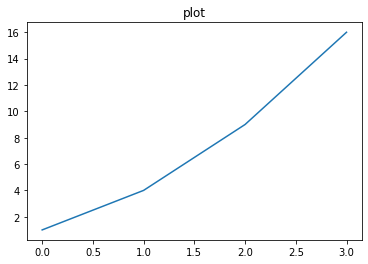

In [4]:
plt.title('plot')
plt.plot([1,4,9,16])
plt.show()

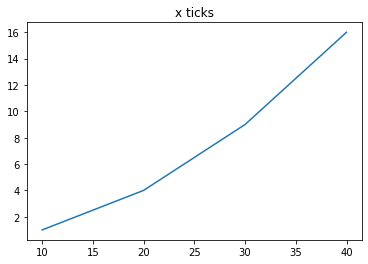

In [5]:
plt.title('x ticks')
plt.plot([10,20,30,40],[1,4,9,16]) #x축,y축 지정
plt.show()

In [6]:
import matplotlib.font_manager as fm
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')
font_list[:]

['C:\\Windows\\Fonts\\LTYPEB.TTF',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\LEELAWDB.TTF',
 'C:\\Windows\\Fonts\\HYCYSM.TTF',
 'C:\\Windows\\Fonts\\GILLUBCD.TTF',
 'C:\\Windows\\Fonts\\HARNGTON.TTF',
 'C:\\Windows\\Fonts\\HYMJRE.TTF',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\HMFMPYUN.TTF',
 'C:\\Windows\\Fonts\\HMKMM.TTF',
 'C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\HANBaekB.ttf',
 'C:\\Windows\\Fonts\\ENS721LI.TTF',
 'C:\\Windows\\Fonts\\JUICE___.TTF',
 'C:\\Windows\\Fonts\\ARIALUNI.TTF',
 'C:\\Windows\\Fonts\\LHANDW.TTF',
 'C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\consolaz.ttf',
 'C:\\Windows\\Fonts\\ENCSCH.TTF',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\HANYheadL.ttf',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\msyi.ttf',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\GOUDOSB.TTF',
 'C:\\Windows\\Fonts\\FZSong_Super.TTF',
 'C:\\Windows\\Fonts\\

In [7]:
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'? ??',
 '???',
 '????',
 '??????',
 'Agency FB',
 'Algerian',
 'AmeriGarmnd BT',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Bahnschrift',
 'Baskerville BT',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'BernhardFashion BT',
 'Blackadder ITC',
 'Blippo Blk BT',
 'Bodoni Bd BT',
 'Bodoni Bk BT',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'BroadwayEngraved BT',
 'Brush Script MT',
 'BrushScript BT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'CentSchbook BT',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'CommercialScript BT',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Cooper Blk BT',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Courier10 B

In [8]:
mpl.rc('font',family='NanumGothic')#폰트 설정
mpl.rc('axes',unicode_minus=False)#한글은 유니코드로 되어있음.영어는 아스키코드

In [9]:
import numpy as np
import pandas as pd

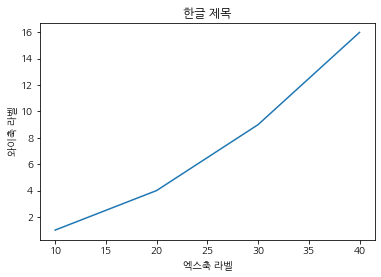

In [10]:
plt.title('한글 제목')
plt.plot([10,20,30,40],[1,4,9,16]) #x축,y축 지정
plt.xlabel('엑스축 라벨')
plt.ylabel('와이축 라벨')
plt.show()

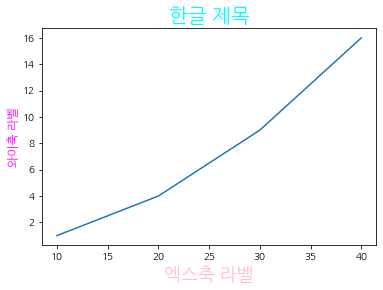

In [144]:
font1={'family':'NanumGothic','size':20,'color':'cyan'}
font2={'family':'NanumGothic','size':18,'color':'pink'}
font3={'family':'NanumGothic','size':12,'color':'magenta'}

plt.title('한글 제목',fontdict=font1)
plt.plot([10,20,30,40],[1,4,9,16]) #x축,y축 지정
plt.xlabel('엑스축 라벨',fontdict=font2)
plt.ylabel('와이축 라벨',fontdict=font3)
plt.show()

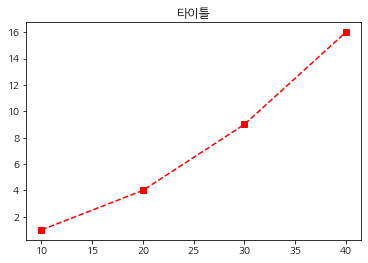

In [145]:
plt.title('타이틀')
plt.plot([10,20,30,40],[1,4,9,16],'rs--')
plt.show()